#***Tracé d'un diagramme binaire, système idéal ou avec azéotrope et comparaison avec un cas réel.***



Comme pour tout programme Python, on commence par l'écriture du sheebang 🇰

In [ ]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Sat Mar 16 12:39:38 2024

@author: Jeanne Herry et Ugo Frosi
"""

"""
Fichier pour tracer des diagrammes binaires idéaux et avec azéotropes.

"""

'\nFichier pour tracer des diagrammes binaires idéaux et avec azéotropes.\n\n'

Les potentiels chimiques et la relation de Gibbs-Helmholtz, dans le cadre d'un système idéal, nous permettent d'arriver à 4 équations, utiles pour connaître le système dans son entièreté :



$ln(\frac{y_{1}}{x_{1}})=-\frac{\Delta rh_{1}^{eb}}{R}(\frac{1}{T}-\frac{1}{T_{1}^{*}})$


$ln(\frac{y_{2}}{x_{2}})=-\frac{\Delta rh_{2}^{eb}}{R}(\frac{1}{T}-\frac{1}{T_{2}^{*}})$

$x_{1}+x_{2}=1$

$y_{1}+y_{2}=1$










Ces équations vont être résolues de deux manières différentes, à la fois à l'aide de la bibliothèque numpy (résolution matricielle) et à l'aide de la bibliothèque scipy (résolution du système). Le tracé des diagrammes en tant que tel se fera à l'aide de la bibliothèque matplotlib. D'où l'importation des librairies suivantes : numpy, scipy et matplotlib.scipy.

# **I- Diagramme Binaire idéal**






In [ ]:
#Importation des librairies

import numpy as np
import scipy
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from scipy.optimize import root

#Programme principal

if __name__ == "__main__":
    pass

On peut également définir des variables globales pour les deux systèmes auquels on s'intéresse : butanol-chlorobenzène et SiCl4/TiCl4.

In [ ]:
#Définition des variables globales: NIST DATABASE


DrhTiCl4_eb=37.5e3 #Enthalpie de vaporisation du tétrachlorure de titane en J.mol-1
DrhSiCl4_eb=30.3e3 #Enthalpie de vaporisation du tétrachlorure de silicium en J.mol-1

Drhbutanol_eb=52e3 #Enthalpie de vaporisation du butanol en J.mol-1
Drhchlorobenz_eb=41e3 #Enthalpie de vaporisation du chlorobenzène en J.mol-1

TTiCl4_eb=407.95 # Température d'ébullition du tétrachlorure de titane en K
TSiCl4_eb=330.28 # Température d'ébullition du tétrachlorure de silicium en K

Tchlorobenz_eb=404.9 # Température du chlorobenzène en K

Tbutanol_eb=390.6 # Température du butanol en K

R=8.314 #Constante des gaz parfaits en mol-1.K-1

#Données tabulées pour le tracé des diagrammes binaires expérimentaux benzène/toluène et eau/propanol.

#Construction du diagramme binaire isobare TiCl4/SiCl4 : B.Fosset, Chimie Tout-En-Un PCSI, Données expérimentales

x_si=[1,0.76,0.54,0.33,0.22,0.15,0.10,0.05,0.02,0]
y_si=[1,0.98,0.94,0.86,0.76,0.65,0.54,0.33,0.15,0]
T_si=[57+273,65+273,75+273,89+273,100+273,108+273,115+273,125+273,132+273,134.95+273]

#Construction du diagramme binaire isobare à azéotrope butanol/chlorobenzene, B.Fosset, Chimie Tout-En-Un PCSI, Données expérimentales

x_butan=[0,0.107,0.170,0.265,0.369,0.502,0.609,0.717,1]
y_butan=[0,0.286,0.369,0.451,0.514,0.584,0.641,0.707,1]
T_butan=[404.9,396.6,393.9,391.6,390.1,389.0,388.7,388.6,390.6]



\> **1- Résolution du système d'équations à l'aide de la bibliothèque scipy**



On peut réecrire nos équation sous la forme suivante :

$ln(\frac{y_{1}}{x_{1}})+\frac{\Delta rh_{1}^{eb}}{R}(\frac{1}{T}-\frac{1}{T_{1}^{*}})=0$


$ln(\frac{y_{2}}{x_{2}})+\frac{\Delta rh_{2}^{eb}}{R}(\frac{1}{T}-\frac{1}{T_{2}^{*}})=0$

$x_{1}+x_{2}-1=0$

$y_{1}+y_{2}-1=0$

On définit dans un premier temps une fonction qui renvoie notre système d'équations sous la forme adéquat

In [ ]:
def equations(variables,T):

    """fonction qui donne les equations couplées à résoudre pour trouver x1 et y1"""
    x1, y1, x2, y2 = variables
    eq1 = x1 + x2 - 1
    eq2 = y1 + y2 -1
    if x1 !=0 and y1!=0:
        eq3 = np.log(y1 / x1) + (DrhSiCl4_eb / R) * (1 / T - 1 / TSiCl4_eb)
    else:
       eq3=np.inf
    if x2 !=0 and y2!=0:
        eq4 = np.log(y2 / x2) + (DrhTiCl4_eb / R) * (1 / T - 1 / TTiCl4_eb)
    else:
        eq4=np.inf
    return [eq1, eq2, eq3, eq4]



On définit ensuite une fonction qui résout le système d'équations à l'aide de la fonction root de la bibliothèque scipy : elle recherche les zéros de l'équation donnée.

In [ ]:
def solve_equations(T):
    """fonction qui résout les equations couplées définies dans la fonction equations et retourne x1, y1, x2 et y2"""
    parametres_init = np.array([0.001, 0.001, 0.99, 0.99])
    result = root(equations, parametres_init, args=(T), method='lm')
    x1, y1, x2, y2 = result.x
    return x1, y1, x2, y2

On doit ensuite créer notre tableau de valeur de températures pour lesquelles on va étudier/tracer le diagramme binaire

In [ ]:
T_val = np.linspace(TSiCl4_eb, TTiCl4_eb, 100)#Création d'une liste de température

On va ensuite prendre pour chaque couple de valeurs x1 ; y1 ; x2 ; y2 la résolution du système d'équations

In [ ]:
x1,y1,x2, y2 = [],[],[],[] #Création de listes pour contenir les différentes valeurs des fractions molaires

for i in range(len(T_val)): #Calcul les fractions molaires pour chaque température définie et ajout aux listes resspectives
    x1.append(solve_equations(T_val[i])[0])
    y1.append(solve_equations(T_val[i])[1])
    x2.append(solve_equations(T_val[i])[2])
    y2.append(solve_equations(T_val[i])[3])

<ipython-input-30-ed03b28cbf43>:12: RuntimeWarning: invalid value encountered in log
  eq4 = np.log(y2 / x2) + (DrhTiCl4_eb / R) * (1 / T - 1 / TTiCl4_eb)
<ipython-input-30-ed03b28cbf43>:8: RuntimeWarning: invalid value encountered in log
  eq3 = np.log(y1 / x1) + (DrhSiCl4_eb / R) * (1 / T - 1 / TSiCl4_eb)


Il nous reste à tracer le diagramme binaire liquide-vapeur à l'aide de la librairie matplotlib

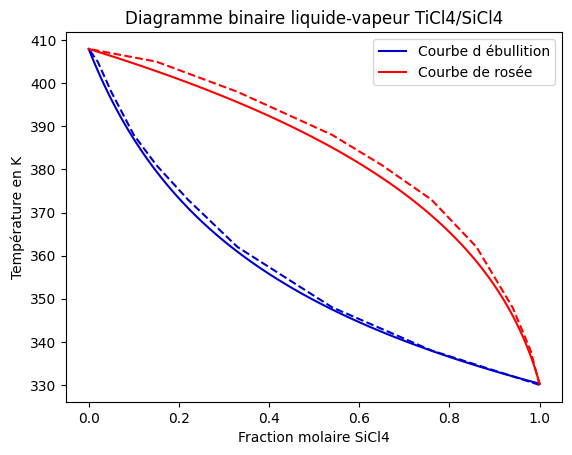

In [ ]:
# Tracer des courbes avec matplotlib
plt.figure(3)
plt.plot(x1,T_val, label='Courbe d ébullition',color='mediumblue')
plt.plot(y1,T_val,label='Courbe de rosée',color='red')
plt.plot(x_si,T_si,linestyle='--',color='mediumblue') #Tracé expérimental de la courbe d'ébullition
plt.plot(y_si,T_si,linestyle='--',color='red') # Tracé expérimental de la courbe de rosée
plt.xlabel('Fraction molaire SiCl4')
plt.ylabel('Température en K')
plt.title('Diagramme binaire liquide-vapeur TiCl4/SiCl4')
plt.legend()
plt.show()

> **2- Résolution matricielle du système à l'aide de la bibliothèque numpy**






On parvient finalement au système de deux équations couplées suivantes 🇰



\begin{array}{c @{=} c}
     ln(\frac{y_{1}}{x_{1}}) +\frac{\Delta rh_{1}^{eb}}{R}(\frac{1}{T}-\frac{1}{T_{1}^{*}})= 0 \\
     ln(\frac{1-y_{1}}{1-x_{1}}) +\frac{\Delta rh_{2}^{eb}}{R}(\frac{1}{T}-\frac{1}{T_{2}^{*}})= 0     
\end{array}







 On peut réécrire ce système d'équations sous forme matricielle, en y appliquant la fonction exponentielle pour ensuite le résoudre à l'aide de la fonction np.linalg pour différentes températures données.

$\begin{pmatrix}
1 & -exp(\frac{\Delta rh_{1}^{eb}}{R}(\frac{1}{T}-\frac{1}{T_{1}^{*}})) \\
-1 & exp(\frac{\Delta rh_{2}^{eb}}{R}(\frac{1}{T}-\frac{1}{T_{2}^{*}}))
\end{pmatrix}$$
\begin{pmatrix}
y_1\\
x_1
\end{pmatrix}$
=
$\begin{pmatrix}
0\\
-1+exp(\frac{\Delta rh_{2}^{eb}}{R}(\frac{1}{T}-\frac{1}{T_{2}^{*}}))
\end{pmatrix}$


Pour ce faire, on définit une fonction matrice permettant de calculer les matrices à gauche et à droite au sein du système. Cette fonction prend en argument les températures d'ébullition et les enthalpies de vaporisation des deux constituants ainsi que les température d'équilibres pour une composition $x_1$ et $y_1$ donnée. Le but est donc de résoudre le système d'inconnues $x_1$ et $y_1$ de manière matricielle.

In [ ]:
#Définition des fonctions

def matrice(T,Drh1eb,Drh2eb,T1eb,T2eb):

    """ matrice est une fonction permettant de définir les matrices du système matriciel d'inconnues x1 et y1
     à résoudre pour toutes températures comprises entre les températures d'ébullition des deux composés d'intérêt pour le tracé du diagramme binaire.
    T est la température d'équilibre pour une composition x1 et y1
    Drh1eb est l'enthalpie de vaporisation du premier composé en J.mol-1
    Dr2eb est l'enthalpie de vaporisation du second composé en J.mol-1
    T1eb est la température d'ébullition du premier composé en K
    T2eb est la température d'ébullition du premier composé en K.

    Cette fonction renvoie les matrices gauches (matg) et droite (matd) correspondant aux matrices des deux membres de l'équation matricelle"""

    matd=np.array([[1, -np.exp(-(Drh1eb/R)*((1/T)-(1/T1eb)))],[-1, np.exp(-(Drh2eb/R)*((1/T)-(1/T2eb)))]])
    matg=np.array([[0],[-1+np.exp(-(Drh2eb/R)*((1/T)-(1/T2eb)))]])
    return matd, matg

Il convient ensuite de définir une liste de températures que l'on va imposer, comprises entre les températures d'ébullition des deux composés, de la plus basse à la plus haute.

In [ ]:

def Temp(T1eb,T2eb,n):
    """Temp est une fonction prenant comme argument T1eb la température d'ébullition en K du composé le moins volatil
et T2eb la composition du composé le plus volatil, ainsi que n le nombre de points de température à considérer
Cette fonction renvoie une liste de température régulièrement espacées comprises entre les températures d'ébullition des deux composés."""

    return np.linspace(T1eb,T2eb,n)

On définit ensuite une seconde fonction (resol) pour la résolution en tant que telle de ce système matriciel, d'inconnues $x_1$ et $y_1$ pour différentes températures T.


In [ ]:
def resol(T,Drh1eb,Drh2eb,T1eb,T2eb):
    """Fonction pour la résolution de l'équation à toutes températures à l'aide de la fonction linalg du module numpy
    T est une liste de températures comprises entre T1eb et T2eb
    Drh1eb est l'enthalpie de vaporisation du premier composé en J.mol-1
    Dr2eb est l'enthalpie de vaporisation du second composé en J.mol-1
    T1eb est la température d'ébullition du premier composé en K
    T2eb est la température d'ébullition du premier composé en K.

    On récupère un tableau dont la première colonne correspond à toutes les valeurs de x1 et la deuxième à toutes les valeurs de y1 pour une température donnée.
    """
    sol=[] #Création du tableau des solutions
    for i in range(len(T)):  #Résolution du système pour toutes températures
        sol.append(np.linalg.solve(matrice(T[i],Drh1eb,Drh2eb,T1eb,T2eb)[0],matrice(T[i],Drh1eb,Drh2eb,T1eb,T2eb)[1])) #Appel de la fonction matrice pour np.linalg qui prend comme argument les deux matrices du système

    return sol


Finalement, une dernière fonction nous permet d'isoler les compositions $x_1$ et $y_1$ pour toutes les températures données à l'aide de la fonction x_y().

In [ ]:
def x_y(Drh1eb,Drh2eb,T1eb,T2eb,n):
    """x_y est une fonction qui permet d'obtenir deux listes : l'une contenant les fractions molaires en phase liquide (x) et les fractions
    molaires en phase gazeuse (y), pour toutes températures, comprises entre T1eb et T2eb.

    Drh1eb est l'enthalpie de vaporisation du premier composé en J.mol-1
    Dr2eb est l'enthalpie de vaporisation du second composé en J.mol-1
    T1eb est la température d'ébullition du premier composé en K
    T2eb est la température d'ébullition du premier composé en K.

    n est le nombre de températures comprises entre les deux températures d'ébullition des composés que l'on considère.
    Cela consiste à récupérer la première et la seconde colonne du tableau de solutions obtenues à l'aide de la fonction resol"""

    x=[] #Définition de la liste des fractions molaires en phase liquide
    y=[] #Définition de la liste des fractions molaires en phase gaz
    for i in range(len(Temp(T1eb,T2eb,n))):
        x.append(resol(Temp(T1eb,T2eb,n),Drh1eb,Drh2eb,T1eb,T2eb)[i][0]) #Récupération de la première colonne
        y.append(resol(Temp(T1eb,T2eb,n),Drh1eb,Drh2eb,T1eb,T2eb)[i][1]) #Récupération de la seconde colonne
    return x,y

On peut alors tracer le diagramme binaire isobare idéal TiCl4/SiCl4

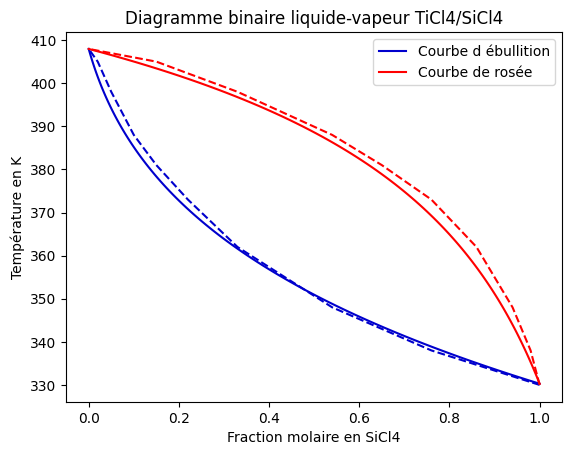

In [ ]:
plt.figure(2)
plt.plot(x_y(DrhTiCl4_eb,DrhSiCl4_eb,TTiCl4_eb,TSiCl4_eb,100)[0],Temp(TSiCl4_eb,TTiCl4_eb,100), label='Courbe d ébullition',color='mediumblue') #Tracé de la courbe d'ébullition
plt.plot(x_y(DrhTiCl4_eb,DrhSiCl4_eb,TTiCl4_eb,TSiCl4_eb,100)[1],Temp(TSiCl4_eb,TTiCl4_eb,100),label='Courbe de rosée',color='red') #Tracé de la courbe de rosée
plt.plot(x_si,T_si,linestyle='--',color='mediumblue') #Tracé expérimental de la courbe d'ébullition
plt.plot(y_si,T_si,linestyle='--',color='red') # Tracé expérimental de la courbe de rosée
plt.xlabel('Fraction molaire en SiCl4') #Titre de l'axe des abscisses
plt.ylabel('Température en K') #Titre de l'axe des ordonnées
plt.title('Diagramme binaire liquide-vapeur TiCl4/SiCl4') #Titre du graphe
plt.legend()
plt.show()

***Interprétation des résultats du diagramme binaire idéal TiCl4/SiCl4***


> Ce mélange est proche d'un mélange idéal. Ainsi, les résultats expérimentaux (courbes en pointillés) coincident avec les courbes théoriques dans le modèle des systèmes idéaux.


Et le diagramme binaire isobare à azéotrope butanol/chlorobenzene

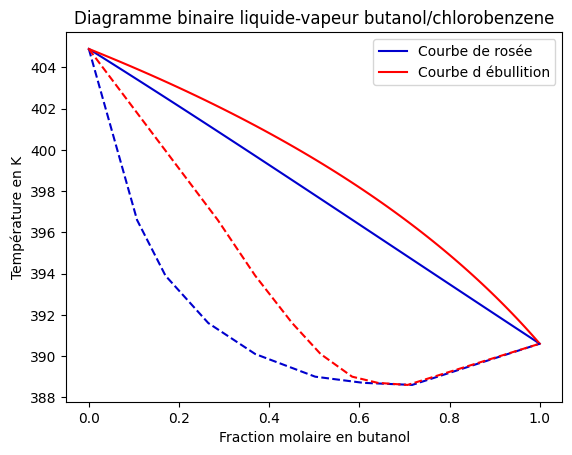

In [ ]:
plt.figure(4)
plt.plot(x_y(Drhchlorobenz_eb,Drhbutanol_eb,Tchlorobenz_eb,Tbutanol_eb,70)[0],Temp(Tbutanol_eb,Tchlorobenz_eb,70), label='Courbe de rosée',color='mediumblue')
plt.plot(x_y(Drhchlorobenz_eb,Drhbutanol_eb,Tchlorobenz_eb,Tbutanol_eb,70)[1],Temp(Tbutanol_eb,Tchlorobenz_eb,70),label='Courbe d ébullition',color='red')
plt.plot(x_butan,T_butan,linestyle='--',color='mediumblue')
plt.plot(y_butan,T_butan,linestyle='--',color='red')
plt.xlabel('Fraction molaire en butanol')
plt.ylabel('Température en K')
plt.title('Diagramme binaire liquide-vapeur butanol/chlorobenzene')
plt.legend()
plt.show()

***Interprétation des résultats du diagramme binaire idéal butanol/chlorobenzene***


> Le mélange butanol/chlorobenzene n'est pas un mélange idéal mais il contient un azéotrope, dû aux écarts à l'idéalité. Avec les équations introduites au début de ce cahier, écrites dans le cas d'un système idéal dont le système butanol/chlorobenzene ne fait pas partie il n'est alors pas possible d'obtenir le point azéotropique.




> **3- Comparaison des deux méthodes de calcul**

Superposons les deux diagrammes trouvés à l'aide des deux méthodes :





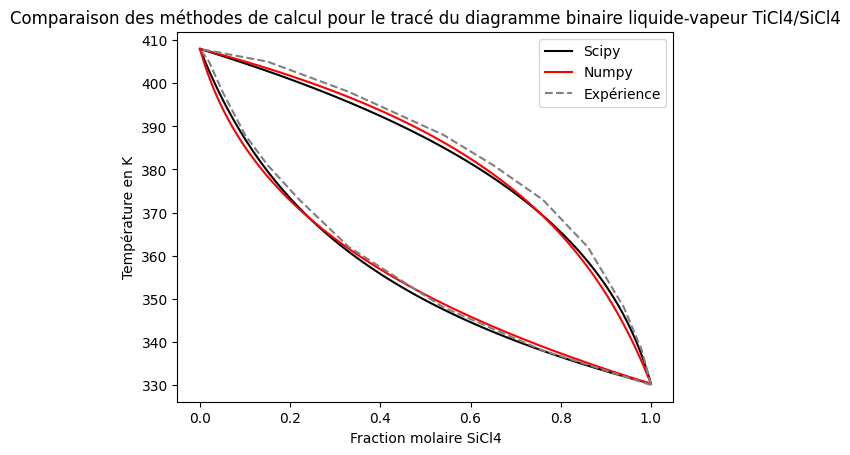

In [ ]:
plt.figure(4)
plt.plot(x1,T_val, color='black', label='Scipy')
plt.plot(y1,T_val,color='black')
plt.plot(x_y(DrhTiCl4_eb,DrhSiCl4_eb,TTiCl4_eb,TSiCl4_eb,100)[0],Temp(TSiCl4_eb,TTiCl4_eb,100), label='Numpy',color='red') #Tracé de la courbe d'ébullition
plt.plot(x_y(DrhTiCl4_eb,DrhSiCl4_eb,TTiCl4_eb,TSiCl4_eb,100)[1],Temp(TSiCl4_eb,TTiCl4_eb,100),color='red') #Tracé de la courbe de rosée
plt.plot(x_si,T_si,linestyle='--',color='grey') #Tracé expérimental de la courbe d'ébullition
plt.plot(y_si,T_si,linestyle='--',color='grey',label='Expérience') # Tracé expérimental de la courbe de rosée
plt.xlabel('Fraction molaire SiCl4')
plt.ylabel('Température en K')
plt.title('Comparaison des méthodes de calcul pour le tracé du diagramme binaire liquide-vapeur TiCl4/SiCl4')
plt.legend()
plt.show()